<h2 style="text-align: center;"><b>K Nearest Neighbors (KNN)</b></h2>

The k Nearest Neighbors (kNN) method is a very popular classification method that is also sometimes used in regression problems. It is one of the most understandable approaches to classification. At the level of intuition, the essence of the method is as follows: look at the neighbors; which ones are predominant --- so are you. Formally, the basis of the method is the compactness hypothesis: if the distance metric between examples is introduced successfully enough, then similar examples are much more likely to lie in the same class than in different ones.

<img src='https://hsto.org/web/68d/a45/6f0/68da456f00f8434e87628dbe7e3f54a7.png' width=600>

To classify each of the test sample objects, the following operations should be performed sequentially:

* Calculate the distance to each object of the training sample
* Select the objects of the training sample, the distance to which is minimal
* The class of the object to be classified is the class most frequently occurring among $k$ nearest neighbors

We will work with a subsample of [forest cover type data from UCI repository](http://archive.ics.uci.edu/ml/datasets/Covertype). There are 7 different classes available. Each object is described by 54 features, 40 of which are binary. A description of the data is available at the link.

### Data processing

In [1]:
import pandas as pd
import numpy as np

In [2]:
all_data = pd.read_csv('forest_dataset.csv')
all_data.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2683,333,35,30,26,2743,121,173,179,6572,...,0,0,0,0,0,0,0,0,0,2
1,2915,90,8,216,11,4433,232,228,129,4019,...,0,0,0,0,0,0,0,0,0,1
2,2941,162,7,698,76,2783,227,242,148,1784,...,0,0,0,0,0,0,0,0,0,2
3,3096,60,17,170,3,3303,231,202,99,5370,...,0,0,0,0,0,0,0,0,0,1
4,2999,66,8,488,37,1532,228,225,131,2290,...,0,0,0,0,0,0,0,0,0,2


In [3]:
all_data.shape

(10000, 55)

Let's allocate the class label values to the `labels` variable, the feature descriptions --- to the `feature_matrix` variable. Since the data are numeric and have no gaps, let's convert them into `numpy` format using `.values` method.

In [4]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

In [5]:
labels

array([2, 1, 2, ..., 2, 2, 2])

### A word about sklearn

**[sklearn](https://scikit-learn.org/stable/index.html)** is a convenient library for introducing machine learning. It implements most of the standard algorithms for building models and working with samples. It has a detailed documentation in English, which you will have to work with.

`sklearn` assumes that your samples take the form of $(X, y)$ pairs, where $X$ is the feature matrix, $y$ is the vector of true values of the target variable, or simply $X$ if the target variables are unknown.

Let's familiarize ourselves with the auxiliary function
[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
It can be used to split the sample into training and test parts.

In [6]:
from sklearn.model_selection import train_test_split

Let's return to the dataset. Now we will work with all 7 types of coverage (the data are already in the variables `feature_matrix` and `labels`, if you have not overridden them). Split the sample into training and test samples using the `train_test_split` method.

In [7]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
    feature_matrix, labels, test_size=0.2, random_state=42)

The `test_size` parameter controls which part of the sample will be test. You can read more about it in [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

The main objects of `sklearn` -- the so-called `estimators`, which could be translated as *estimators*, but shouldn't be, since they are essentially *models*. They are divided into **classifiers** and **regressors**.

As an example of a model, the classifiers are
[nearest neighbor method](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) and
[logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). What logistic regression is and how it works is not important now.

All models in `sklearn` must necessarily have at least 2 methods (more on methods and classes in python will be in the next lessons) -- `fit` and `predict`.

The `fit(X, y)` method is responsible for training the model and takes as input a training sample in the form of a *trait matrix* $X$ and a *response vector* $y$.

The model trained after `fit` can now call the `predict(X)` method, which will return the predictions of this model on all features from the $X$ matrix as a vector.

You can call `fit` on the same model several times, each time it will be trained anew on the passed data set.

Models also have *hyperparameters*, which are usually set when the model is created.

Let's consider all this on the example of logistic regression.

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
# создание модели с указанием гиперпараметра C
clf = LogisticRegression(C=1)
# model training
clf.fit(train_feature_matrix, train_labels)
# prediction on a test sample
y_pred = clf.predict(test_feature_matrix)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
y_pred

array([2, 1, 2, ..., 1, 2, 1])

Now we would like to measure the quality of our model. For this purpose, we can use the `score(X, y)` method, which will calculate some error function on the sample $X, y$, but which one depends on the model. We can also use one of the functions of the `metrics` module, for example [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html), which, as the name implies, will calculate the accuracy of the predictions.

In [11]:
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, y_pred)

0.6075

Finally, the last thing I would like to mention is the grid search of hyperparameters. Since models have many hyperparameters that can be changed, and the quality of the model depends on these hyperparameters, we would like to find the best parameters in this sense. The easiest way to do this is to simply search through all possible variants within reasonable limits.

You can do this with the [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) class, which searches the grid and calculates the quality of the model using cross-validation (CV).

In logistic regression, for example, you can change the parameters `C` and `penalty`. Let's do this. Note that the search may take a long time. See the documentation for the meaning of the parameters.

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
# recreate the model by specifying the solver
clf = LogisticRegression(solver='saga')

# describe the grid on which we will search
param_grid = {
    'C': np.arange(1, 5), # you can also specify a regular array, [1, 2, 3, 4]
    'penalty': ['l1', 'l2'],
}

# create a GridSearchCV object
search = GridSearchCV(clf, param_grid, n_jobs=-1, cv=5, refit=True, scoring='accuracy')

# let's run a search
search.fit(feature_matrix, labels)

# derive the best parameters
print(search.best_params_)

{'C': 4, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In this case, the search tries all possible pairs of C and penalty values from the given sets.

In [14]:
accuracy_score(labels, search.best_estimator_.predict(feature_matrix))

0.642

Notice that we pass the entire sample to GridSearchCV, not just the training part of it. This can be done because the search still uses crossvalidation. However, sometimes the *validation* part is still separated from the sample, because the hyperparameters could be retrained to fit the sample during the search.

In tasks, you will have to repeat this for the nearest neighbor method.

### Model Training

The quality of classification/regression by nearest neighbors method depends on several parameters:

* the number of neighbors `n_neighbors`.
* distance metric between objects `metric`
* weights of neighbors (neighbors of the test example can be included with different weights, for example, the farther away the example is, the smaller the coefficient of its "voice" is taken into account) `weights`.

Train on the dataset `KNeighborsClassifier` of `sklearn`.

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf = KNeighborsClassifier()

# model training
clf.fit(train_feature_matrix, train_labels)
# prediction on a test sample
y_pred = clf.predict(test_feature_matrix)

accuracy_score(test_labels, y_pred)

0.7365

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf = KNeighborsClassifier()

# describe the grid on which we will search
param_grid = {
    'n_neighbors': np.arange(1, 5), # you can also specify a regular array, [1, 2, 3, 4]
    'metric': ['minkowski', 'l1', 'l2', 'manhattan'],
    'weights': ['uniform', 'distance'],
}

# create a GridSearchCV object
search = GridSearchCV(clf, param_grid, n_jobs=-1, cv=5, refit=True, scoring='accuracy')

# запустим поиск
search.fit(feature_matrix, labels)

# derive the best parameters
print(search.best_params_)

{'metric': 'l1', 'n_neighbors': 4, 'weights': 'distance'}


In [17]:
accuracy_score(labels, search.best_estimator_.predict(feature_matrix))

1.0

Let's select the parameters of our model

* ♪ Grid the number of neighbors parameter from 1 to 10 ♪

* Also you try using different metrics: `['manhattan', 'euclidean']` *

* Try using different strategies for calculating weights: `['uniform', 'distance']`

In [18]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_neighbors': np.arange(1, 11), # также можно указать обычный массив, [1, 2, 3, 4]
    'metric': ['manhattan', 'euclidean'],
    'weights': ['uniform', 'distance'],
}

clf_grid = GridSearchCV(clf, params, cv=5, scoring='accuracy', n_jobs=-1)
# Теперь обучение. Ваш код здесь

# запустим поиск
clf_grid.fit(feature_matrix, labels)

# выведем наилучшие параметры
print(clf_grid.best_params_)

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}


Let's bring out the best parameters

In [19]:
clf_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

Using the found optimal number of neighbors, compute the probabilities of class membership for the test sample (`.predict_proba`).

In [20]:
optimal_clf = KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')

optimal_clf.fit(train_feature_matrix, train_labels)

pred_prob = optimal_clf.predict_proba(test_feature_matrix)

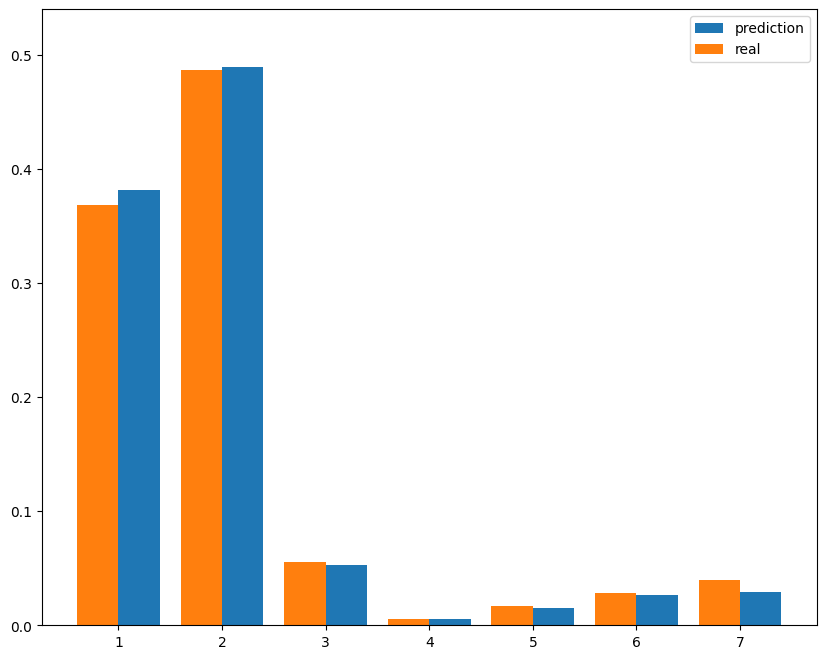

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

unique, freq = np.unique(test_labels, return_counts=True)
freq = list(map(lambda x: x / len(test_labels),freq))

pred_freq = pred_prob.mean(axis=0)
plt.figure(figsize=(10, 8))
plt.bar(range(1, 8), pred_freq, width=0.4, align="edge", label='prediction')
plt.bar(range(1, 8), freq, width=-0.4, align="edge", label='real')
plt.ylim(0, 0.54)
plt.legend()
plt.show()

In [22]:
pred_freq[2]

0.05281153156965046